In [54]:
# Getting the stock data
# In this notebook I'm using yfinance python API to download TCS.NS data

import yfinance as yf

tcs = yf.Ticker('TCS.NS')
hist = tcs.history(period="3y") # Downloaded 3 years of stock data

In [55]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-20 00:00:00+05:30,2080.536576,2105.018945,2070.894880,2087.058838,2952646,0.0,0.0
2020-07-21 00:00:00+05:30,2107.949298,2116.125780,2080.678202,2103.270264,2665286,0.0,0.0
2020-07-22 00:00:00+05:30,2108.894683,2108.894683,2064.656057,2071.036621,2861534,0.0,0.0
2020-07-23 00:00:00+05:30,2071.036489,2071.036489,2044.616274,2052.367432,2265766,0.0,0.0
2020-07-24 00:00:00+05:30,2036.581933,2044.616718,2008.791118,2039.323120,3665100,0.0,0.0


In [56]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,746.000000,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.0
mean,3120.855808,3148.887362,3090.215201,3119.323029,2.687271e+06,0.245308,0.0
std,379.672846,380.322547,377.092902,379.370849,1.696493e+06,2.881114,0.0
min,2036.581933,2044.616718,2008.791118,2039.323120,0.000000e+00,0.000000,0.0
25%,2982.709866,3007.092666,2941.702344,2976.329224,1.661345e+06,0.000000,0.0
50%,3181.566600,3201.980998,3147.995923,3173.584351,2.243028e+06,0.000000,0.0
75%,3356.517908,3386.468643,3329.455225,3356.701233,3.162353e+06,0.000000,0.0
max,3871.307377,3879.992257,3819.532604,3857.103760,1.983933e+07,67.000000,0.0


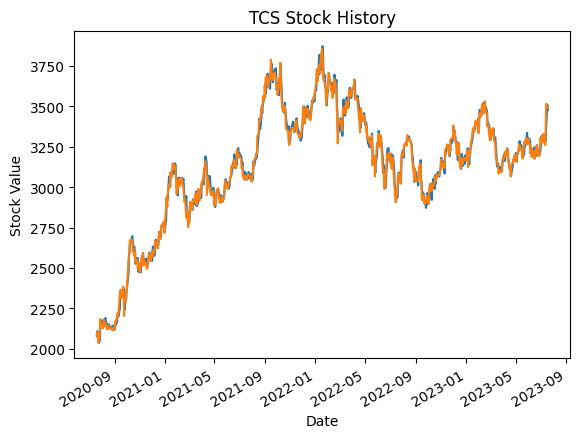

In [102]:
import matplotlib.pyplot as plt

# Plotting opeining and closing prices
hist["Open"].plot()
hist["Close"].plot()
plt.ylabel('Stock Value')
plt.title('TCS Stock History')

plt.show()

In [92]:
df = hist['Open'].values
df = df.reshape(-1, 1)
df.shape

(746, 1)

In [59]:
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (522, 1)
test_data:  (224, 1)


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train_data)
test = scaler.transform(test_data)

In [61]:
import numpy as np

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [62]:
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)

In [86]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((472, 50, 1), (472,), (174, 50, 1), (174,))

In [79]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=56, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=56, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=56))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50, 56)            12992     
                                                                 
 dropout_10 (Dropout)        (None, 50, 56)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50, 56)            25312     
                                                                 
 dropout_11 (Dropout)        (None, 50, 56)            0         
                                                                 
 lstm_12 (LSTM)              (None, 56)                25312     
                                                                 
 dropout_12 (Dropout)        (None, 56)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [80]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [81]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 9s 92ms/step - loss: 0.0740
Epoch 2/10
15/15 [==============================] - 1s 92ms/step - loss: 0.0158
Epoch 3/10
15/15 [==============================] - 1s 91ms/step - loss: 0.0110
Epoch 4/10
15/15 [==============================] - 2s 137ms/step - loss: 0.0095
Epoch 5/10
15/15 [==============================] - 2s 128ms/step - loss: 0.0077
Epoch 6/10
15/15 [==============================] - 1s 94ms/step - loss: 0.0087
Epoch 7/10
15/15 [==============================] - 1s 96ms/step - loss: 0.0090
Epoch 8/10
15/15 [==============================] - 1s 96ms/step - loss: 0.0075
Epoch 9/10
15/15 [==============================] - 1s 94ms/step - loss: 0.0073
Epoch 10/10
15/15 [==============================] - 1s 93ms/step - loss: 0.0083


In [82]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

6/6 [==============================] - 2s 25ms/step


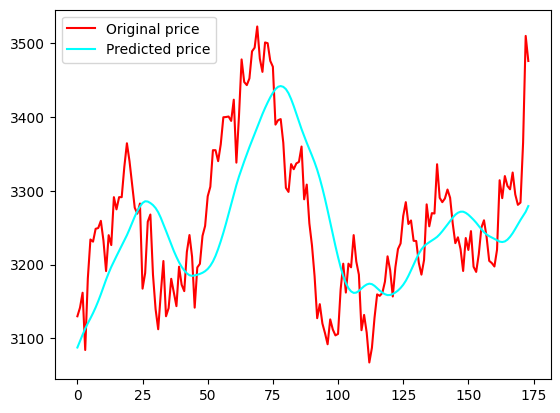

In [83]:
plt.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()